## Double Gyre

The driven Double Gyre system is defined by the _stream function_

$$\psi (x,y,t) = A\sin(\pi f(x,t))\sin(\pi y)$$

where 

$f(x,t) = a(t) x^2 + b(t)x,$

$a(t) = \eta \sin(\omega t),$

$b(t) = 1-2 a(t)$,

over the domain  $ \Omega = [0, 2]\times[0, 1]$.
The usual parameter values are
$A = 0.1$ $\epsilon = 0.1$ and $\omega = \pi/5$. 

In [1]:
import numpy as np
from scipy.integrate import odeint

def a(t):
    return epsilon*np.sin(omega*t)

def b(t):
    return 1-2*epsilon*np.sin(omega*t)

def f(x,t):
    return a(t)*x**2+b(t)*x

def double_gyre(X, t):
    x,y = X
    vx = -np.pi*A*np.sin(np.pi*f(x,t))*np.cos(np.pi*y)
    vy =  np.pi*A*np.cos(np.pi*f(x,t))*np.sin(np.pi*y)*(2*a(t)*x+b(t))
    return np.array([vx,vy])

In [2]:
# parameters
A    = 0.1
epsilon  = 0.1
omega = np.pi/5

#time sample
n = 2000
tmax = 400
times = np.linspace(0, tmax, n)

def simulate_Double_Gyre(x0, y0, tmax, n):
    t = times
    f = odeint(double_gyre, (x0, y0), t)
    x, y = f.T
    return x,y

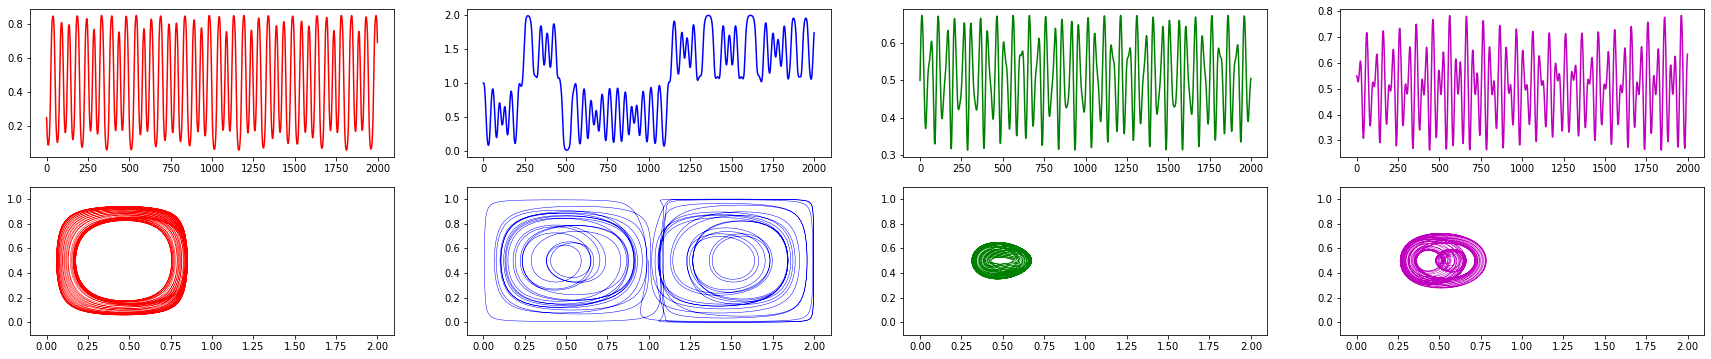

In [3]:
import pylab as plt

# initial conditions
P = [(0.25, 0.125), (1, 0.5), (0.5, 0.625), (0.55, 0.5)]
col = ['r','b','g', 'm']
x = []
y = []

fig = plt.figure(figsize=(30,6))
for i in range(len(P)):
    X,Y = simulate_Double_Gyre(P[i][0], P[i][1], tmax, n)
    x.append(X)
    y.append(Y)
    ax1 = fig.add_subplot(241+i)
    ax1.plot(x[i], c = col[i])
    ax2 = fig.add_subplot(245+i)
    ax2.set_xlim(-0.1,2.1)
    ax2.set_ylim(-0.1,1.1)
    ax2.plot(x[i], y[i], linewidth = 0.5, c = col[i])

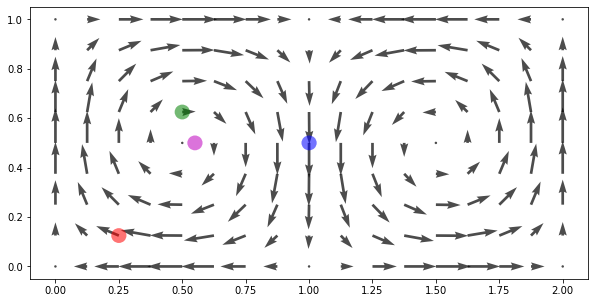

In [4]:
import matplotlib.animation as animation

partition = 8
N = int(len(P))

fig, ax = plt.subplots(1,1,figsize=(10,5))
#ax.axis('off')

# make a 2D mesh grid of size 2*partition x partition
X, Y = plt.meshgrid(np.arange(0, 2+1/partition, 1/partition), np.arange(0, 1+1/partition, 1/partition))
vX, vY = double_gyre((X,Y), 0.1)

# vector arrows
Q = ax.quiver(X, Y, vX, vY, scale=5, alpha=0.7)

# initialize array of particles
C = np.empty([N],plt.Circle)
for i in range(0,N):
    C[i] = plt.Circle((-1,-1), radius = 0.03, fc = col[i], alpha=0.55)

for i in range(0,N):
    C[i].center = (P[i][0], P[i][1])
    ax.add_patch(C[i])

# animation for particle moving along the vector field
def animate(t, Q, X, Y, C, N):
    
    vX,vY = double_gyre((X,Y),t)
    Q.set_UVC(vX,vY)  
    
    # update particles' positions
    for i in range(0,N):
        idx = np.argwhere(times > t)[0]
        C[i].center = (x[i][idx], y[i][idx])        

    return Q,C

ani = animation.FuncAnimation(fig, animate,
         fargs=(Q,X,Y,C,N),
         interval=1,blit=False,
         frames=np.linspace(0, 390, 2000))

plt.show()

In [68]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)

ani.save('figures/animation_double_gyre.mp4', writer = writer, dpi=150)

In [ ]:
ani.save('figures/animation_double_gyre.gif', writer = 'pillow')

In [ ]:
def delay_embedding(x, d, tau):
    